In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

url = 'https://raw.githubusercontent.com/nicholasmfraser/covid19_preprints/master/data/covid19_preprints.csv'
df_covid = pd.read_csv(url)

df_covid['posted_date'] = pd.to_datetime(df_covid['posted_date'])
df_covid['Date'] = df_covid['posted_date'].apply(lambda x: x.date())
byDate = df_covid.groupby('Date').count()

ACE = df_covid[df_covid.title.str.contains('ACE',case=True)]
byACE = ACE.groupby('Date').count()['source']

var = 'S protein'
Spro = df_covid[df_covid.title.str.contains(fr'\b{var}\b',case=False, regex=True)]
bySpro = Spro.groupby('Date').count()['source']

In [3]:
var = 'Remdesivir'
Rem = df_covid[df_covid.title.str.contains(fr'\b{var}\b',case=False, regex=True)]
byRem = Rem.groupby('Date').count()['source']

In [4]:
var = 'ivermectin'
iver = df_covid[df_covid.title.str.contains(fr'\b{var}\b',case=False, regex=True)]
byiver = iver.groupby('Date').count()['source']

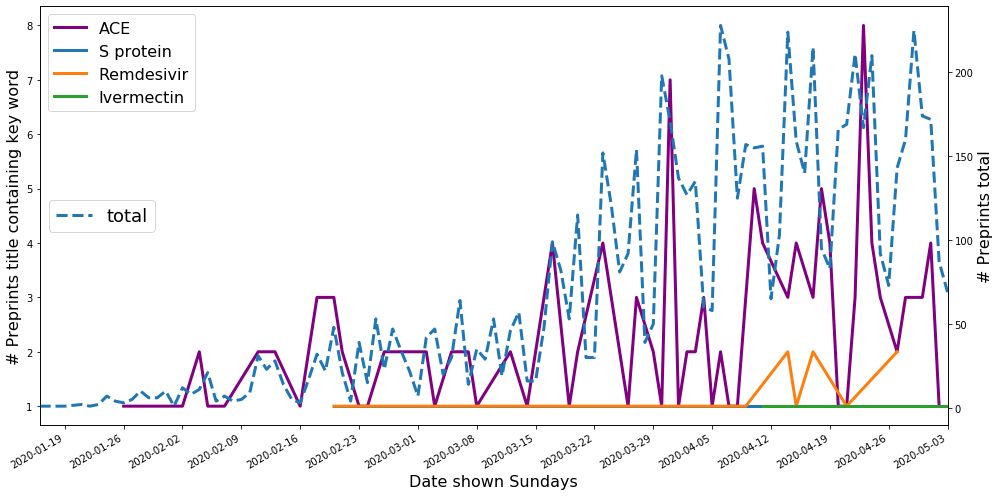

In [9]:
fig, ax = plt.subplots(figsize=(14,7))

ax = byACE.plot(color='purple', lw=3)
ax = bySpro.plot(lw=3)
ax = byRem.plot(lw=3)
ax = byiver.plot(lw=3)

ax2 = ax.twinx()
ax2.set_ylabel('# Preprints total', size = 16)
ax2 = byDate['source'].drop(byDate['source'].index[0]).plot(ls='--', lw=3)

ax.legend(['ACE', 'S protein', 'Remdesivir', 'Ivermectin'], prop={'size': 16})
ax2.legend(['total'], prop={'size': 18}, loc=6)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
fig.autofmt_xdate()
ax.set_ylabel('# Preprints title containing key word', size=16)
ax.set_xlabel('Date shown Sundays', size=16)
plt.tight_layout()